# Tennis Player analysis

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [40]:
# load and investigate the data
players = pd.read_csv('tennis_stats.csv')
players.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [41]:
players.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


### Check for nan values

In [42]:
players.isnull().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

### Checking the Correlation

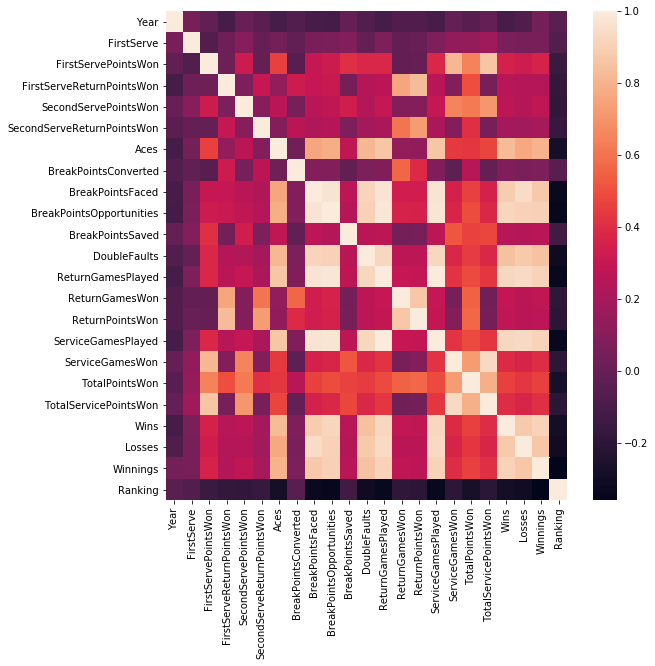

In [43]:
data=players.corr()
plt.figure(figsize =(9,9))
sns.heatmap(data)
plt.show()

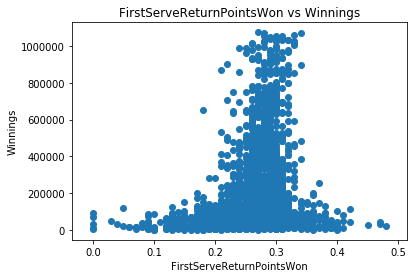

In [44]:
# exploratory analysis

plt.scatter(players['FirstServeReturnPointsWon'],players['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')

plt.show()


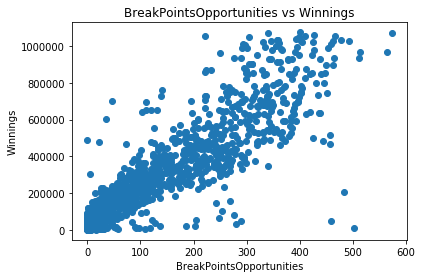

In [45]:
plt.scatter(players['BreakPointsOpportunities'],players['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()



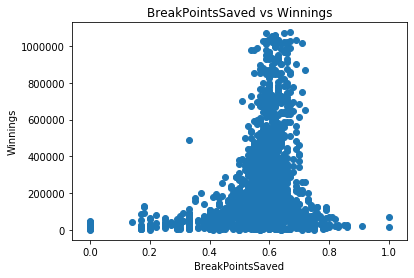

In [46]:
plt.scatter(players['BreakPointsSaved'],players['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()


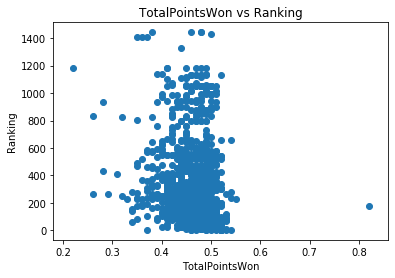

In [47]:

plt.scatter(players['TotalPointsWon'],players['Ranking'])
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()



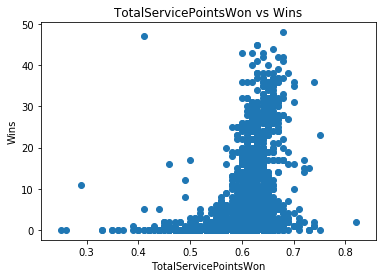

In [48]:
plt.scatter(players['TotalServicePointsWon'],players['Wins'])
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()



## Single feature linear regression (FirstServeReturnPointsWon)

Predicting Winnings with FirstServeReturnPointsWon Test Score: 0.08385167865442533


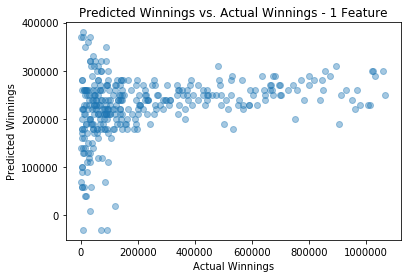

In [49]:


# select features and value to predict
features = players[['FirstServeReturnPointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with FirstServeReturnPointsWon Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()


## single feature linear regression (BreakPointsOpportunities)

Predicting Winnings with BreakPointsOpportunities Test Score: 0.7907001594741706


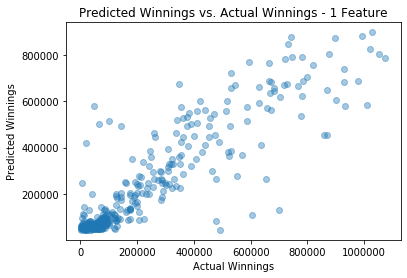

In [50]:
# select features and value to predict
features = players[['BreakPointsOpportunities']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()




##  Two feature linear regression

Predicting Winnings with 2 Features Test Score: 0.8099216941278878


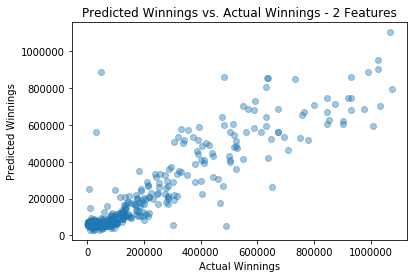

In [51]:


# select features and value to predict
features = players[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()




## multiple features linear regression

Predicting Winnings with Multiple Features Test Score: 0.8834811176598717


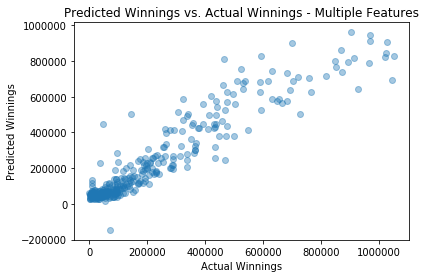

In [52]:
# select features and value to predict
features = players[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

